# 911 Calls Capstone Project

#### Importing Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

#### Read in the csv file as a dataframe called df

In [20]:
df = pd.read_csv('C:/Users/Lenovo/Desktop/Project/911 Calls Project/911.csv')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649242 entries, 0 to 649241
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        649242 non-null  float64
 1   lng        649242 non-null  float64
 2   desc       649242 non-null  object 
 3   zip        570645 non-null  float64
 4   title      649242 non-null  object 
 5   timeStamp  649242 non-null  object 
 6   twp        648959 non-null  object 
 7   addr       649242 non-null  object 
 8   e          649242 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 44.6+ MB


In [22]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [23]:
df['zip'].value_counts().head(5)

19401.0    44520
19464.0    42867
19403.0    34110
19446.0    31521
19406.0    21969
Name: zip, dtype: int64

In [24]:
df['twp'].value_counts().head(5)

LOWER MERION    54454
ABINGTON        39105
NORRISTOWN      36705
UPPER MERION    35255
CHELTENHAM      29900
Name: twp, dtype: int64

In [25]:
df['title'].nunique()

148

#### Creating new features

In [26]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [27]:
df['Reason'].value_counts()

EMS        324824
Traffic    226181
Fire        98237
Name: Reason, dtype: int64

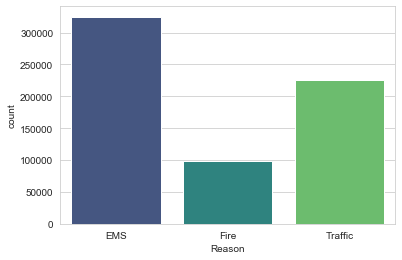

In [30]:
sns.countplot(x ='Reason',data=df,palette='viridis')

In [31]:
type(df['timeStamp'].iloc[0])

str

In [32]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [33]:
df['hour'] = df['timeStamp'].apply(lambda time : time.hour)
df['month'] = df['timeStamp'].apply(lambda time :time.month)
df['Day of week'] = df['timeStamp'].apply(lambda time : time.dayofweek)

In [36]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [39]:
df['Day of week'] = df['Day of week'].map(dmap)

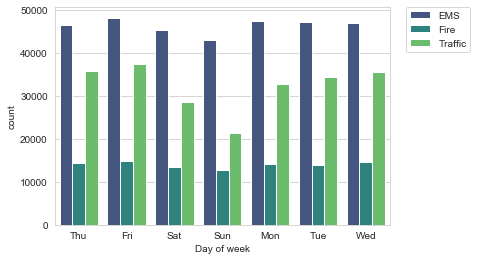

In [41]:
sns.countplot(x = 'Day of week', data=df, hue='Reason', palette='viridis')

#Relocate to legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Now do the same for Month:

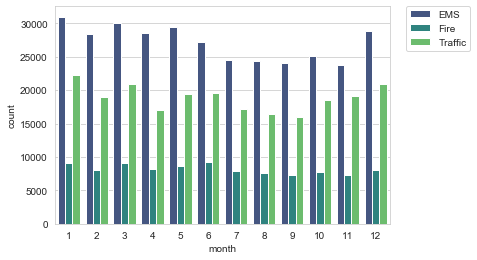

In [44]:
sns.countplot(x='month', data=df, hue='Reason', palette='viridis')

#To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [45]:
byMonth = df.groupby('month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,Day of week
month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


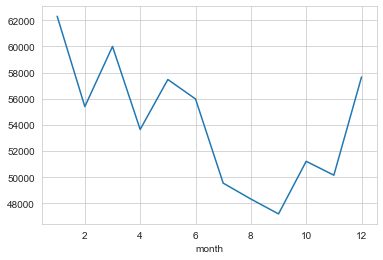

In [46]:
byMonth['twp'].plot()

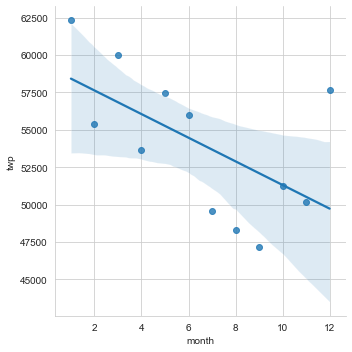

In [47]:
sns.lmplot(x='month',y='twp',data=byMonth.reset_index())

In [48]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

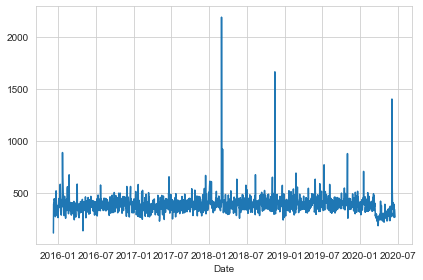

In [49]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

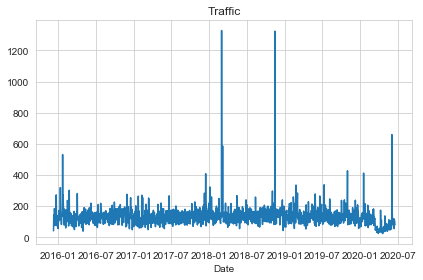

In [50]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

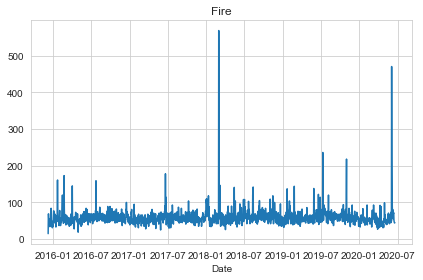

In [51]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

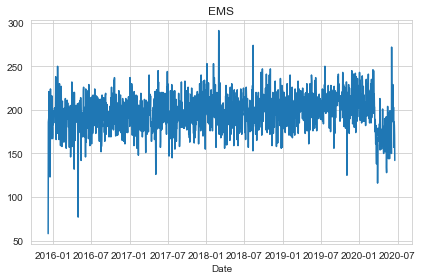

In [52]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

In [53]:
dayHour = df.groupby(by=['Day of week','hour']).count()['Reason'].unstack()
dayHour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of week,,,,,,,,,,,,,,,,,,,,,
Fri,1936,1596,1416,1274,1304,1601,2622,4082,4944,5178,...,6221,6884,6928,6963,5535,4941,4278,3817,3342,2785
Mon,1854,1525,1328,1249,1310,1803,2630,4357,5412,5617,...,5533,6079,6217,6281,5311,4385,3690,3163,2607,2027
Sat,2375,2011,1850,1552,1415,1534,1845,2436,3382,4232,...,5303,5060,5087,5082,4859,4654,4047,3796,3134,2900
Sun,2376,2098,1899,1580,1439,1454,1694,2343,2940,3634,...,4632,4351,4464,4394,4273,4047,3647,3071,2552,2275
Thu,1700,1382,1395,1211,1266,1745,2775,4383,5236,5305,...,5961,6361,6261,6809,5388,4594,3965,3421,2780,2314


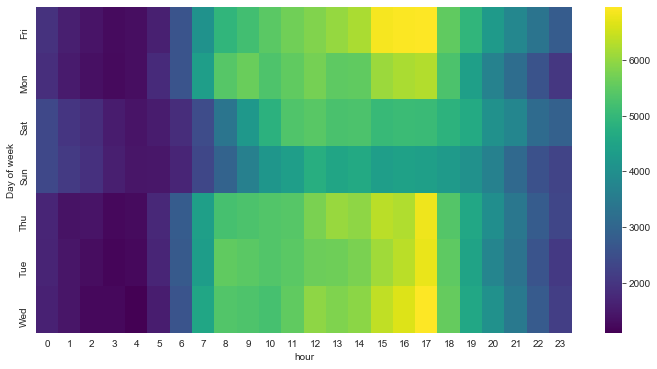

In [54]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

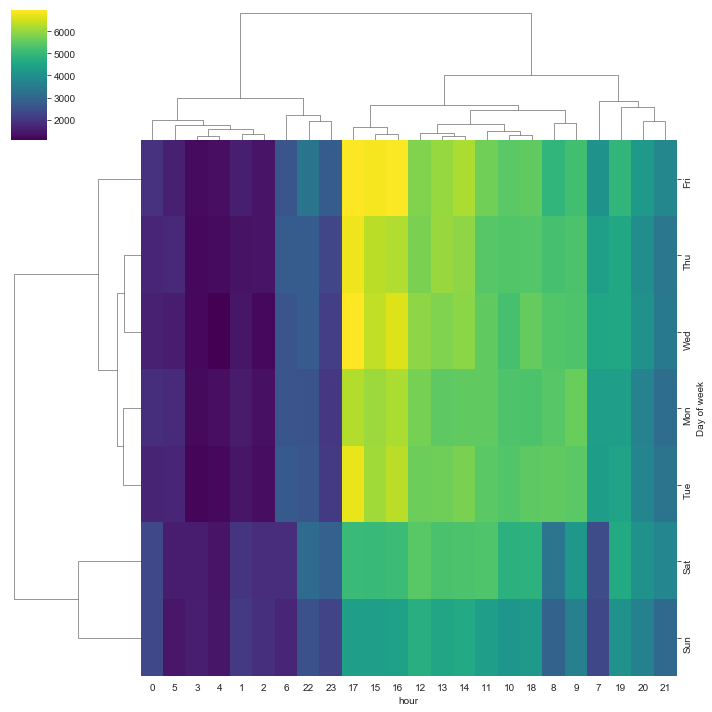

In [55]:
sns.clustermap(dayHour,cmap='viridis')

In [56]:
dayMonth = df.groupby(by=['Day of week','month']).count()['Reason'].unstack()
dayMonth.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
Day of week,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,8531,7103,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,7795,7929,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,7546,6395,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6278,6567,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9088,6964,7508,6954,7482,8358,8151


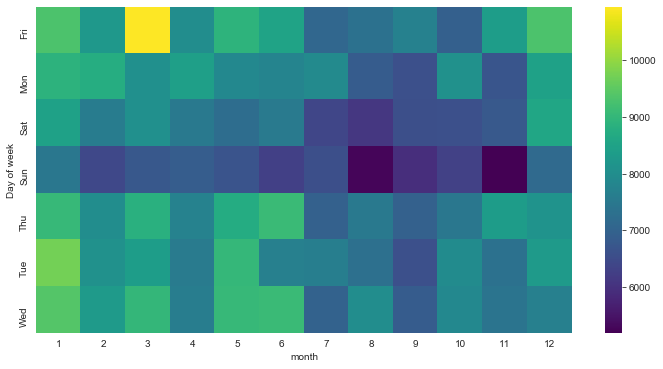

In [57]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

<Figure size 864x432 with 0 Axes>

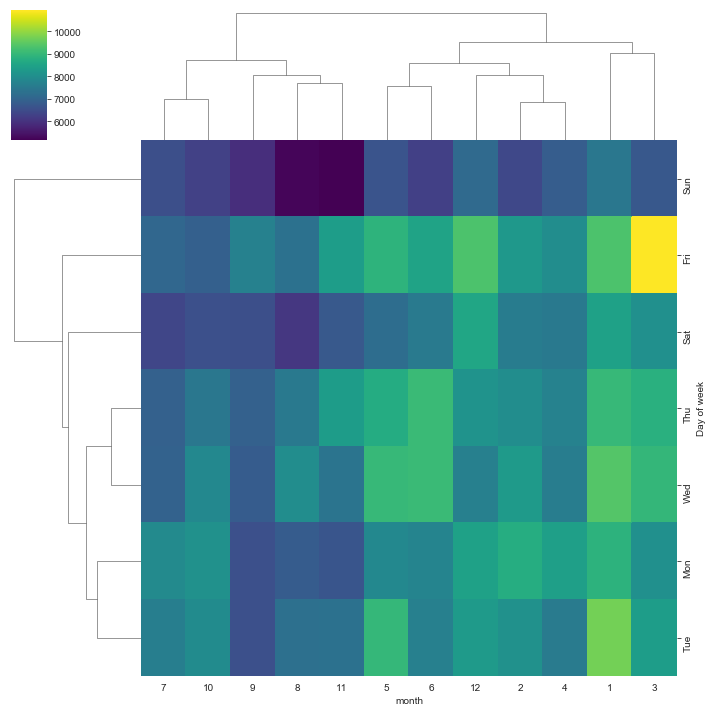

In [58]:
plt.figure(figsize=(12,6))
sns.clustermap(dayMonth,cmap='viridis')